In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from gym import wrappers
import math

num_states = 25
#create the environment
env = gym.make('MountainCar-v0')
env._max_episode_steps = 1000
episodes = 40000
lr = 0.05 #how fast we want to learn
gamma = .99 #discount on future rewards
epsilon = 1.0
num_actions = env.action_space.n
mean_rewards = []

#create a dictionary for the Qtable
Q = {}
for i in range (0, num_states):
    for j in range (0, num_states):
        for k in range (0, num_actions):
            Q[i, j, k] = 0
    

In [2]:
#turn the state space into 25 buckets
def get_state(observation):
    pos_low = env.observation_space.low[0]
    pos_high = env.observation_space.high[0]
    vel_low = env.observation_space.low[1]
    vel_high = env.observation_space.high[1]
    pos_range = (pos_high - pos_low)/num_states
    vel_range = (vel_high - vel_low) /num_states
    pos = np.round(((observation[0] - pos_low)/pos_range),0)
    vel = np.round(((observation[1] - vel_low)/vel_range),0)
    return (pos, vel)


In [3]:
env.observation_space.low[0]

-1.2

In [4]:
#choose the action with the highest Q value based on the position and velocity
def best_action(Q, p, v, actions=[0, 1, 2]):
    values = []
    for a in actions:
        values.append(Q[p, v ,a])
    action = np.argmax(values)

    return action

episode  100 score  -1000.0 epsilon 0.992
episode  200 score  -1000.0 epsilon 0.985
episode  300 score  -1000.0 epsilon 0.978
episode  400 score  -1000.0 epsilon 0.970
episode  500 score  -1000.0 epsilon 0.963
episode  600 score  -1000.0 epsilon 0.956
episode  700 score  -1000.0 epsilon 0.949
episode  800 score  -1000.0 epsilon 0.942
episode  900 score  -1000.0 epsilon 0.935
episode  1000 score  -1000.0 epsilon 0.928
episode  1100 score  -1000.0 epsilon 0.921
episode  1200 score  -1000.0 epsilon 0.914
episode  1300 score  -1000.0 epsilon 0.907
episode  1400 score  -861.0 epsilon 0.900
episode  1500 score  -1000.0 epsilon 0.894
episode  1600 score  -1000.0 epsilon 0.887
episode  1700 score  -1000.0 epsilon 0.880
episode  1800 score  -1000.0 epsilon 0.874
episode  1900 score  -1000.0 epsilon 0.867
episode  2000 score  -1000.0 epsilon 0.861
episode  2100 score  -1000.0 epsilon 0.854
episode  2200 score  -818.0 epsilon 0.848
episode  2300 score  -713.0 epsilon 0.841
episode  2400 score  -6

episode  19400 score  -195.0 epsilon 0.233
episode  19500 score  -158.0 epsilon 0.232
episode  19600 score  -161.0 epsilon 0.230
episode  19700 score  -151.0 epsilon 0.228
episode  19800 score  -223.0 epsilon 0.226
episode  19900 score  -212.0 epsilon 0.225
episode  20000 score  -151.0 epsilon 0.223
episode  20100 score  -151.0 epsilon 0.221
episode  20200 score  -153.0 epsilon 0.220
episode  20300 score  -148.0 epsilon 0.218
episode  20400 score  -160.0 epsilon 0.217
episode  20500 score  -187.0 epsilon 0.215
episode  20600 score  -154.0 epsilon 0.213
episode  20700 score  -152.0 epsilon 0.212
episode  20800 score  -152.0 epsilon 0.210
episode  20900 score  -156.0 epsilon 0.209
episode  21000 score  -150.0 epsilon 0.207
episode  21100 score  -184.0 epsilon 0.205
episode  21200 score  -320.0 epsilon 0.204
episode  21300 score  -147.0 epsilon 0.202
episode  21400 score  -148.0 epsilon 0.201
episode  21500 score  -148.0 epsilon 0.199
episode  21600 score  -187.0 epsilon 0.198
episode  21

episode  38500 score  -134.0 epsilon 0.056
episode  38600 score  -153.0 epsilon 0.055
episode  38700 score  -113.0 epsilon 0.055
episode  38800 score  -151.0 epsilon 0.054
episode  38900 score  -147.0 epsilon 0.054
episode  39000 score  -119.0 epsilon 0.054
episode  39100 score  -144.0 epsilon 0.053
episode  39200 score  -154.0 epsilon 0.053
episode  39300 score  -139.0 epsilon 0.052
episode  39400 score  -108.0 epsilon 0.052
episode  39500 score  -150.0 epsilon 0.052
episode  39600 score  -162.0 epsilon 0.051
episode  39700 score  -147.0 epsilon 0.051
episode  39800 score  -181.0 epsilon 0.051
episode  39900 score  -154.0 epsilon 0.050


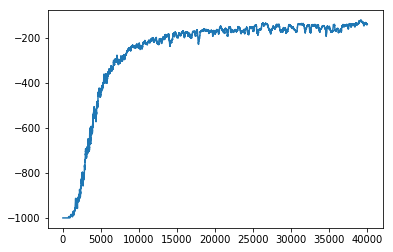

In [5]:
#learn the model
def q_learning_agent(Q, alpha, gamma, epsilon):  
    score = 0
    total_rewards = []
    #run episodes to train the model
    for i in range(episodes):
        done = False
        #epsilon decreases with time to change towards more decisions being based previous actions and less basd on 
        #random actions
        if epsilon > 0.01:
            epsilon = epsilon - (epsilon * 3)/episodes
        obs = env.reset()
        p, v = get_state(obs)
        
        #print results so progress can be viewed
        if i % 100 == 0 and i > 0:
            print('episode ', i, 'score ', score, 'epsilon %.3f' % epsilon)
        score = 0
        while not done:
            #decide between random action and action based on previous experience
            if np.random.random() < epsilon:
                action = np.random.choice([0,1,2])
            else: 
                action = best_action(Q, p, v)
            obs_, reward, done, info = env.step(action)
            p_, v_ = get_state(obs_)
            score += reward
            #alter reward so that higher states higher up the hill and/or more velocity result in more reward and thus are the more optimal choice
            #note this is not reflected in the output since score is used to track rewards in terms of the values assigned
            #by open AI gym
            
            
            if p == 17: 
                reward == reward + 10
            if p == 18: 
                reward == reward + 20
            if p == 19: 
                reward == reward + 35
            if p == 20: 
                reward == reward + 55
            if p == 21:
                reward == reward + 80
            if p == 22: 
                reward == reward + 110
            if p == 23:
                reward == reward + 145
            if p == 24: 
                reward == reward + 250
             
            action_ = best_action(Q, p_, v_)
            #update Q values
            Q[p, v, action] = Q[p, v, action] + lr * (reward + gamma * Q[p_, v_, action_] - Q[p, v, action])
            p = p_
            v = v_
        total_rewards.append(score)
        
    #track results to show learning
    
    for z in range(episodes):
        mean_rewards.append(np.mean(total_rewards[max(0, z-100):(z+1)]))
    plt.plot(mean_rewards)

q_learning_agent(Q, lr, gamma, epsilon) 

In [6]:
#run 1 epidsode of trained model to demonstrate
def run_model(Q):
    obs = env.reset()
    r = 0
    steps = 0
    done = False
    obs = env.reset()
    while not done:
        p, v = get_state(obs)
        #get best action
        action = best_action(Q, p, v)
        env.render()
        obs, reward, done, info = env.step(action)
        r += reward
        steps += 1
    print('total steps: ', steps,' score: ', r)
    return
run_model(Q)

total steps:  113  score:  -113.0
